# Example on how to visualise embeddings in virtual reality

It's easy to visualise an embeddings-space in virtual reality. Just follow the example here :) 

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import json
import numpy as np

TO_EMBED_COUNT = 8000

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
batch_xs, batch_ys = x_train[:TO_EMBED_COUNT, :], y_train[:TO_EMBED_COUNT]

# Save the vectors

Save the vectors so we can upload them to http://projector.tensorflow.org/


In [5]:
with open("vectors.tsv", 'w') as f:
    for image in batch_xs:
        image = image.flatten()
        f.write("\t".join([str(a) for a in image]))
        f.write("\n")
with open('labels.tsv', 'w') as f:
    for label in batch_ys: 
        f.write(str(label) + "\n")

![savebutton](images/uploadbutton.png)
![pca](images/pca.png)

# Get an embedding space 
Run the t-sne algorithm. Then save a bookmark in the bottom-right corner. For me t-sne already gave nice results after 165 iterations: 
![tsne](images/tsne.png)

In [6]:
# The names of the variables you want to visualise in the bookmark
names = ["tsne-0", "tsne-1", "tsne-2"]

# Load the embedding space from tensorboard
with open('state.txt') as f: 
    for line in f:
        j = json.loads(line)[0]
        
# Save X,Y,Z and the true label we will use for visualisation        
xyz = list()
for point, label in zip(j['projections'], batch_ys):
    if names[0] not in point:
        continue
    toap = list()

    for name in names: 
        toap.append(point[name])
    toap.append(label)
    xyz.append(toap)        
    
# Make it a numpy array with scaled color for the class.     
tovis = np.array(xyz, dtype=np.float32)
tovis[:, 3] /= 255.0
tovis[:, 3] *= 20

# Save it in the way which is expected
tovis.byteswap().tofile('embeddings.npy')

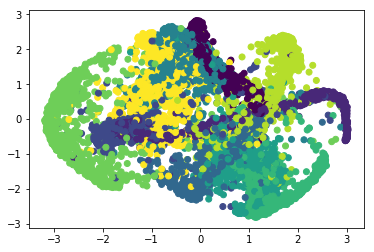

In [7]:
# Scatter the points to make sure we stored the right thing
plt.scatter(tovis[:, 0], tovis[:, 1], c=tovis[:, 3])

## Viewing the result
After uploading the file to https://rmeertens.github.io/ImmersivePoints/upload.html I got the following link: https://rmeertens.github.io/ImmersivePoints/oculus.html?name=8a7eccb4-2914-4f8f-8b0a-b86645b821c6.xyzi

If you open this link in a browser or on your oculus quest you can look around you to see the labels in what T-sne found in your embedding space!

![savebutton](images/embedding3d.png)